<a href="https://colab.research.google.com/github/m-r-tanha/Azure-Projects/blob/main/Headed_CNN_and_LSTM_in_different_channel_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Each Layer being a column for the next layer

In [1]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import concatenate
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, normalize, minmax_scale
#from tensorflow.contrib import rnn
#from tensorflow.contrib.layers.python.layers import batch_norm as batch_norm
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, RNN, GRU
import numpy as np
from google.colab import files
import io
#from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
from keras.utils import np_utils
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Main City in Huwaei from 2019.xlsx to Main City in Huwaei from 2019.xlsx
User uploaded file "Main City in Huwaei from 2019.xlsx" with length 12346436 bytes


In [2]:
import scipy
from keras.layers import Flatten, TimeDistributed
from keras.layers.convolutional import Conv1D, Conv1D
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
import pandas as pd
from numpy import mean
from numpy import std
from keras import regularizers
from keras.layers import BatchNormalization

In [13]:
tf.compat.v1.random.set_random_seed(42)
np.random.seed(42)
tf.compat.v1.disable_v2_behavior() 
tf.compat.v1.reset_default_graph()

TIME_STEPS= 1 
n_seq = 1
#n_steps = 2
Target = 'THRPUT_UE_DL'

def Min_Max_Sc(df_x, df_y):
    

    scaler = MinMaxScaler(feature_range = (0,1))
    input_scaler = scaler.fit(df_x)
    output_scaler = scaler.fit(df_y)
    df_x_sc = input_scaler.transform(df_x)
    df_y_sc = input_scaler.transform(df_y)
    #dff_sc_invers= input_scaler.inverse_transform(sc_data)
    return df_x_sc, df_y_sc

def inv_Min_Max_Sc(y):
    scaler = MinMaxScaler(feature_range = (-1,1))
    output_scaler = scaler.fit(y)
    y_actual = scaler.inverse_transform(y)

def Data(raw_data,Target):
    #TIME_STEPS = 6
    raw_data.to_excel('alldata.xlsx')
    raw_data1= raw_data.copy()
    df_y = raw_data1[Target]
    df_x = raw_data1.drop(Target,axis =1)
    def replace_missing (attribute):
        return attribute.interpolate(inplace=True)

    def split_sequences(df_x, df_y, TIME_STEPS):
        X, y = list(), list()
        #for j in range (TIME_STEPS-1):
          #y.append(0)
        for i in range(len(df_x)):
        # find the end of this pattern
            end_ix = i + TIME_STEPS
        # check if we are beyond the dataset
            if end_ix > len(df_x):
                break
        # gather input and output parts of the pattern
            seq_x = df_x.iloc[i:end_ix, :]
            seq_y = df_y.iloc[end_ix-1]

            X.append(seq_x)
            y.append(seq_y)
        return array(X), array(y)
    
    df_y = pd.DataFrame(df_y)
    df_x.rename(index=df_x.PERIOD_START_TIME, inplace=True)
    df_x.drop('NE',axis=1,inplace=True)
    df_x.drop('PERIOD_START_TIME',axis=1,inplace=True)
    df_x, df_y = Min_Max_Sc(df_x, df_y)
    df_x = pd.DataFrame(df_x)
    df_y = pd.DataFrame(df_y)
    for i in range (df_x.columns.size):
        replace_missing(df_x[df_x.columns[i]])
        replace_missing(df_y)

   
    # Split train data and test data
    train_size = int(len(df_x)*0.8)
    X, Y = split_sequences(df_x,df_y,TIME_STEPS)
    Yall = pd.DataFrame(Y)
    (pd.DataFrame(X[0,:,:])).to_excel("X.xlsx")
    pd.DataFrame(Yall.iloc[0]).to_excel("Y.xlsx")
    
    X_train, X_test = X[:train_size], X[train_size:]
    Y_train, Y_test = Y[:train_size], Y[train_size:]
    

    # print('X_train.shape: ', X_train.shape)
    # print('y_train.shape: ', Y_train.shape)
    # print('X_test.shape: ', X_test.shape)
    # print('y_test.shape: ', Y_test.shape)
    return X_train, X_test, Y_train, Y_test


path_p = "Main City in Huwaei from 2019.xlsx"
df_orig= pd.read_excel(path_p,'Tabriz')
df0 = df_orig.copy()
df0.replace([np.inf, -np.inf], np.nan, inplace=True)
df0.fillna(0, inplace = True)
df_yy = df0[Target]

def Corre (df, Target):

    df_corl1 = df.copy()
    df_corl2 = df.copy()
    df_corl3 = df.copy()
    df_corl4 = df.copy()
    df_temp = df.copy()
    co = list()
    cor_list1 = list()
    cor_list2 = list()
    cor_list3 = list()
    cor_list4 = list()


    df.rename(index=df.PERIOD_START_TIME, inplace=True)
    df.drop('NE',axis=1,inplace=True)
    df.drop('PERIOD_START_TIME',axis=1,inplace=True)        
   
    dfff = df[Target] 
    df.drop(Target,axis =1, inplace = True)
    for i in range(len(df.columns)) :
         co.append(scipy.stats.pearsonr(df.iloc[:,i], dfff)[0])
    
    co=pd.DataFrame(co)
    co_a = co.T
    co_a.columns = df.columns    
    add_time_NE = ['PERIOD_START_TIME','NE']
    
    '''
    
    for j in range(co_a.size):
        if abs(co_a.iloc[0,j] ) > 0.75:
            cor_list1.append( co_a.columns[j])
        elif abs(co_a.iloc[0,j] ) > 0.5 and abs(co_a.iloc[0,j] ) < 0.75:
            cor_list2.append((co_a.columns[j]))
        elif abs(co_a.iloc[0,j] ) > 0.3 and abs(co_a.iloc[0,j] ) < 0.5:
            cor_list3.append((co_a.columns[j]))
        elif abs(co_a.iloc[0,j] ) > 0 and abs(co_a.iloc[0,j] ) < 0.3:
            cor_list4.append((co_a.columns[j]))

        '''   

    for j in range(co_a.size):
        if abs(co_a.iloc[0,j] ) > 0.92:
            cor_list1.append( co_a.columns[j])
        if abs(co_a.iloc[0,j] ) > 0.80:
            cor_list2.append((co_a.columns[j]))
        if abs(co_a.iloc[0,j] ) > 0.72:
            cor_list3.append((co_a.columns[j]))
        if abs(co_a.iloc[0,j] ) > 0.62:
            cor_list4.append((co_a.columns[j]))
     

    #cor_list1 = cor_list1 +add_time_NE + [Target]+['PDCP_DATA_VOL_DL']
    cor_list1 = cor_list1 +add_time_NE + [Target]
    cor_list2 = cor_list2 +add_time_NE + [Target]
    cor_list3 = cor_list3 +add_time_NE + [Target]
    cor_list4 = cor_list4 +add_time_NE + [Target]
 
    df_corl1 = df_corl1[cor_list1]  
    df_corl2 = df_corl2[cor_list2]
    df_corl3 = df_corl3[cor_list3]
    df_corl4 = df_corl4[cor_list4]

    return df_corl1, df_corl2, df_corl3, df_corl4

corl1, corl2, corl3, corl4= Corre(df0, Target)
corl3.to_excel("Corl3.xlsx")
n_features1 = corl1.shape[1]-3
n_features2 = corl2.shape[1]-3
n_features3 = corl3.shape[1]-3
n_features4 = corl4.shape[1]-3

# print(n_features1)
# print(n_features2)
# print(n_features3)
# print(n_features4)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
#from statsmodels.tsa.arima.model import ARIMA

X1_train, X1_test, Y_train, Y_test = Data(corl1,Target) 
X1_train = X1_train.reshape(X1_train.shape[0],X1_train.shape[1], n_features1 )
X1_test = X1_test.reshape(X1_test.shape[0],X1_test.shape[1], n_features1 )

X2_train, X2_test, Y_train, Y_test = Data(corl2,Target) 
X2_train = X2_train.reshape(X2_train.shape[0],X2_train.shape[1], n_features2 ) 
X2_test = X2_test.reshape(X2_test.shape[0],X2_test.shape[1], n_features2 )

X3_train, X3_test, Y_train, Y_test = Data(corl3,Target) 
X3_train = X3_train.reshape(X3_train.shape[0],X3_train.shape[1], n_features3 ) 
X3_test = X3_test.reshape(X3_test.shape[0],X3_test.shape[1], n_features3 )

X4_train, X4_test, Y_train, Y_test = Data(corl4,Target) 
X4_train = X4_train.reshape(X4_train.shape[0],X4_train.shape[1], n_features4 ) 
X4_test = X4_test.reshape(X4_test.shape[0],X4_test.shape[1], n_features4 )

# print('X1_train.shape: ', X1_train.shape) 
# print('X2_train.shape: ', X2_train.shape) 
# print('X3_test.shape: ', X3_train.shape) 
# print('X4_test.shape: ', X4_train.shape)
#print(X1_train)
#print(Y_train)

def Model_Arch(): 

  n_timesteps, n_outputs = X1_train.shape[1], Y_train.shape[1]


  inputs1 = Input(shape=( n_timesteps, n_features1))
  inputs2 = Input(shape=( n_timesteps, n_features2))
  inputs3 = Input(shape=( n_timesteps, n_features3))
  inputs4 = Input(shape=( n_timesteps, n_features4))
  
  # head 1
  conv1 = Conv1D(128, activation = 'relu',kernel_size = 1) (inputs1)
  conv1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False) (conv1)
  conv1 = Conv1D(256, activation = 'relu',kernel_size = 1) (conv1)
  conv1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False) (conv1)
  lstm1 = LSTM(2024, activation=  'relu' ,   return_sequences=True) (conv1)
  lstm1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False) (lstm1)
  lstm1 = LSTM(1024, activation=  'relu' ,   return_sequences=True) (lstm1)
  lstm1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False) (lstm1)
  Flat1 = Flatten()(lstm1)
  print('Flat1:  ',Flat1)
 
#   # head 2
#   lstm2 = LSTM(1024, activation=  'relu' ,   return_sequences=True) (inputs2)
#   lstm2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False) (lstm2)
#   lstm2 = LSTM(1024, activation=  'relu' ,   return_sequences=True) (lstm2)
#   lstm2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False) (lstm2)

#   Flat2 = Flatten()(lstm2)
#   print(Flat2)

#  # Head 3
#   lstm3 = LSTM(1024, activation=  'relu' ,   return_sequences=True) (inputs3)
#   lstm3 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False) (lstm3)
#   lstm3 = LSTM(1024, activation=  'relu' ,   return_sequences=True) (lstm3)
#   lstm3 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False) (lstm3)
#   Flat3 = Flatten()(lstm3)
#   #f= pd.DataFrame(Flat3)
#   print(Flat3)
#   #Flat3.
#  # Head 4

#   #conv4 = Dropout(.5)(conv4)
#   lstm4 = LSTM(1024, activation=  'relu' ,   return_sequences=True) (inputs4)
#   lstm4 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False) (lstm4)
#   lstm4 = LSTM(1024, activation=  'relu' ,   return_sequences=True) (lstm4)
#   lstm4 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False) (lstm4)
#   Flat4 = Flatten()(lstm4)
#   print(Flat4)


 
  # merged = concatenate([Flat1, Flat2, Flat3, Flat4])
  
  dense1 = Dense(200, activation= 'relu')(Flat1)
  dense1 = Dropout(0.5)(dense1)
  #dense1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False) (dense1)
  dense1 = Dense(100, activation='relu')(dense1)
  dense1 = Dropout(.5)(dense1)
  dense1 = Dense(20, activation='relu')(dense1)
  dense1 = Dropout(.5)(dense1)
  #dense3 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False) (dense3)
  outputs = Dense(n_outputs, activation= 'relu')(dense1)
  
  
  #model = Model(inputs=[inputs1, inputs2, inputs3, inputs4], outputs=outputs)
  #model = Model(inputs=[inputs1, inputs2, inputs3, inputs4 ], outputs=outputs)
  model = Model(inputs=[inputs1, inputs2, inputs3, inputs4], outputs=outputs)
  # save a plot of the model
  plot_model(model, show_shapes=True, to_file='multiheaded.png')
  optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07, name='Adagrad')
  model.compile(loss='msle', optimizer=optimizer, metrics=['accuracy'])
  return model

In [17]:
%modeX Plain

UsageError: Line magic function `%modeX` not found.


# New Section

In [18]:
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

def evaluate_model(X1_train, X1_test,X2_train, X2_test,X3_train, X3_test, X4_train, X4_test, Y_train, Y_test):

  model = Model_Arch()
  checkpoint_path = "training_1/cp.ckpt"
  checkpoint_dir = os.path.dirname(checkpoint_path)

  # Create a callback that saves the model's weights
  cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                  save_weights_only=True,
                                                  verbose=1)
  best_model_file = "vgg.h5"
  best_model = ModelCheckpoint(best_model_file, monitor='val_loss', verbose=0, save_best_only=True)

  #model.load_weights(checkpoint_path)
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=0,patience=60)
  #mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='min', verbose=1,  save_best_only=True)
  # fit network
  history = model.fit([X1_train,X2_train,X3_train, X4_train], Y_train, epochs=250, batch_size=32, verbose=1, validation_split = 0.2)
  #history = model.fit([X1_train,X2_train,X3_train, X4_train], Y_train, epochs=550, batch_size=100, verbose=1, validation_split = 0.3, shuffle=False)

  #model.save('best_model.h5') 
  #saved_model = load_model('best_model.h5')
  #print(Flat3)
  #print(f)
  # evaluate model
  _, accuracy = model.evaluate([X1_test,X2_test,X3_test, X4_test], Y_test, batch_size=32, verbose=0)
  prediction_test = model.predict([X1_test, X2_test, X3_test, X4_test])
  prediction_train = model.predict([X1_train, X2_train, X3_train, X4_train])
  #print(prediction)
  return  accuracy, prediction_test, prediction_train, history
# summarize scores
def summarize_results(scores):
  print(scores)
  #m, s = mean(scores), std(scores)
  #print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
  # run an experiment
def run_experiment(repeats=1):
  # load data
  #X_train, Y_train, X_test, Y_test = load_dataset()
  # repeat experiment
  
  scores = list()
  for r in range(repeats):
    score, prediction_test, prediction_train, history = evaluate_model(X1_train, X1_test,X2_train, X2_test,X3_train, X3_test, X4_train, X4_test,Y_train, Y_test)
    score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
  summarize_results(scores)
  return scores, prediction_test, prediction_train, history
  #summarize_results(scores)
#prediction = run_experiment()
scores, prediction_test, prediction_train, history = run_experiment()
#print(prediction_test)

def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
#plot_loss (history_bilstm)
plot_loss (history)

def plot_future(prediction, y_test):
    
    YY=df_orig[[Target]]
    
    scaler = MinMaxScaler(feature_range = (0,1))
    output_scaler = scaler.fit(YY)
    y_test = output_scaler.inverse_transform(y_test)
    prediction1 = prediction.reshape(prediction.shape[0],1)
    prediction1 = output_scaler.inverse_transform(prediction1)
    prediction1 = prediction.reshape(prediction1.shape[0],1)
    plt.figure(figsize=(10, 6))
    range_future = len(prediction1)
    plt.plot(np.arange(range_future), np.array(y_test), 
            label='True Future')     
    plt.plot(np.arange(range_future),np.array(prediction1),
            label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('THP')
#print(Y_test)
plot_future(prediction_test, Y_test)
plot_future(prediction_train, Y_train)

Flat1:   Tensor("flatten_4/Reshape:0", shape=(?, 1024), dtype=float32)
Train on 273 samples, validate on 69 samples
Epoch 1/250


FailedPreconditionError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

# New Section

# New Section

In [ ]:
Y_test.shape

(86, 1)

In [ ]:
prediction_train.shape[0]

342

In [ ]:
%xmode plain


Exception reporting mode: Plain


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


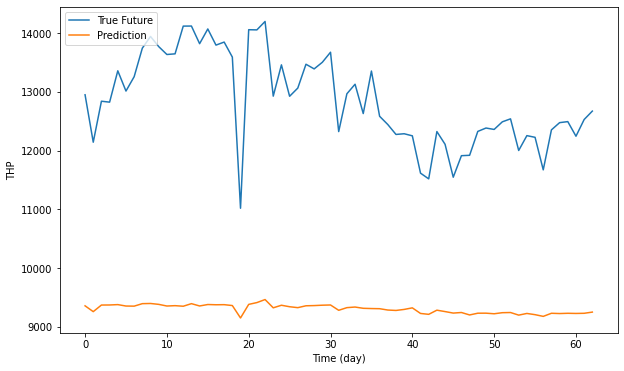

In [ ]:
saved_model = Model_Arch()
saved_model = load_model('vgg.h5')

X1_train, X1_test, Y_train, Y_test = Data(corl1,Target) 
X1_train = X1_train.reshape(X1_train.shape[0],X1_train.shape[1], n_features1 )
X1_test = X1_test.reshape(X1_test.shape[0],X1_test.shape[1], n_features1 )

X2_train, X2_test, Y_train, Y_test = Data(corl2,Target) 
X2_train = X2_train.reshape(X2_train.shape[0],X2_train.shape[1], n_features2 ) 
X2_test = X2_test.reshape(X2_test.shape[0],X2_test.shape[1], n_features2 )

X3_train, X3_test, Y_train, Y_test = Data(corl3,Target) 
X3_train = X3_train.reshape(X3_train.shape[0],X3_train.shape[1], n_features3 ) 
X3_test = X3_test.reshape(X3_test.shape[0],X3_test.shape[1], n_features3 )

X4_train, X4_test, Y_train, Y_test = Data(corl4,Target) 
X4_train = X4_train.reshape(X4_train.shape[0],X4_train.shape[1], n_features4 ) 
X4_test = X4_test.reshape(X4_test.shape[0],X4_test.shape[1], n_features4 )



prediction_test = saved_model.predict([X1_test, X2_test, X3_test, X4_test])
plot_future(prediction_test, Y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=Model_Arch, epochs=100, batch_size=10, verbose=0)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['relu', 'relu','ELUs']
momentum = [.5,.7,.9]
lr = [0.1, .001, 0.005 ]
param_grid = dict(activation = activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X1_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.063492 using {'activation': 'relu'}
0.011905 (0.016836) with: {'activation': 'tanh'}
0.063492 (0.089791) with: {'activation': 'relu'}
nan (nan) with: {'activation': 'ELUs'}
